# Cross-validation: level 1

In the regression and classification notebooks we saw how each type of supervised learning algorithm - kernels, tree-based learners, and neural networks - have parameter(s) that need to be properly tuned in order for them to provide useful predictive power.  Failure to do th is results in a learner that either **underfits** the data - providing too stiff of a model to explain the underlying data - or **overfits** the data - providing far too complicated a model for the data.

With the simple toy datasets we have been playing with so far this parameter selection can be done 'by hand'.  That is, we can adjust the parameter to its optimal value by visually checking that it does a good job of approximating the underlying data generating function.  However in practice doing this work by hand is impossible.  This is both because typical datasets have too many dimensions to be visualized (so say goodbye to the ability to visually check the efficacy of a paramter choice) and because many kernels, trees, and neural nets have too many parameters to adjust (e.g., modern deep neural nets can easily have thousands or even millions of parameters that need adjusting).  

So we need a way to do this parameter adjustment automatically, regardless of the dimension of the dataset and number of parameters to adjust.  The most common way of doing this is a procedure known as **cross-validation**.  

> **Cross-validation** is the most common procedure for automatically tuning the parameters of a regression or classification model.

In this notebook you will learn how to use scikit-learn's built in functionality for this procedure for each of the core algorithm types.  The point of this exercise is to get you familiar with the functionality and (scikit) syntax of these fundamental procuedures.  In Layer 2 of the course we will go deeper into exactly how cross-validation works, and write some code to perform cross-validation that mirrors very closely to what you will be using from scikit-learn (or any other cross-validation functionality for that matter).

To help you build your intuition about how cross-validation performs in practice we will stick with our toy datasets for this exercise, so that you can see how well the results work.  In a future notebook in Layer 1 you will then apply cross-validation functionality on a real dataset.

------
This isn't a notebook you just read - you'll need to complete several coding portions of it (either individually or in groups) and think about the questions posed herein in order to build up your intuitive understanding of these algorithms, as well as your practical ability to use them via scikit-learn.  Whenever you see 'TODO' please do perform the requested task.

In other words, this is 'learning by discovery' notebook where you (either individually or in small groups) will start to build up your understanding of machine learning by doing real work and discussing it with your peers and instructors.  This is the best way to learn anything, far more effective than a book or lecture series.

In [1]:
### in this cell we import necessary libraries for the demo
import numpy as np                  # a fundamental numerical linear algebra library
import matplotlib.pyplot as plt     # a basic plotting library
import pandas as pd                 # a basic data handling library
import sys
from sklearn.metrics import accuracy_score   # an accuracy scoring function from scikit learn
sys.path.append('utils')            # append our utility names

# this line is required in order to plot in a jupyter notebook itself
%matplotlib inline 

# 1.  Cross-validation for regression

Lets get started.  First we load in a familiar nonlinear regression dataset first shown in the nonlinear regression section of the Layer 1 regression notebook.

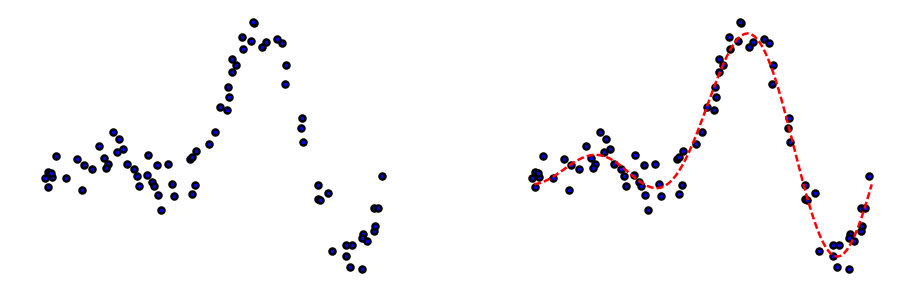

In [2]:
# load in the data and true function
data = np.asarray(pd.read_csv('datasets/regr_nonlinear_data.csv'))
input_data_2 = data[:,0]
output_data_2 = data[:,1]

func = np.asarray(pd.read_csv('datasets/regr_nonlinear_func.csv'))
true_x_2 = func[:,0]
true_y_2 = func[:,1]

# plot the data and true underlying data-generating function
import regression_level_1_utils as utils  # a set of simple plotting utilities for this notebook
utils.cust_plt_util(input_data_2,output_data_2,true_x_2,true_y_2)

Now - recall from the Layer 1 regression notebook that regardless of the algorithm type we used - whether kernel, tree, or neural-network based - we have at least one paramter that needs tuning.  We are going automatically tune each algorithm's parameter to fit this dataset - using cross-validation.

> **Make sure you have your completed version of the Layer 1 regression  notebook open while you work on the following exercises.**

[Scikit-learn provides a variety of of cross-validation functionality](http://scikit-learn.org/stable/modules/cross_validation.html), in this notebook we will be using [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html), which provides generic cross-validation functionality and is very light on syntax. 

In the next Python cell we import this library into the notebook environment.

In [3]:
# an easy to use cross-validation scikit-learn function
from sklearn.model_selection import GridSearchCV

### Kernel-based regressors

We will walk through the syntax of using GridSearchCV with the kernel based regressor we first saw in the Layer 1 regression notebook.  Recall that there you tinkered around with the 'degree' parameter of the 'poly' kernel.  The code to declare an instance of this regressor looked like

> regressor = KernelRidge(kernel = 'poly',degree = 30)

Now we will test out a whole range of values for degree - say every integer value from 1 to 50 -  and pick the best one via cross-validation.  The code for performing this cross-validation is in the next cell.

In [4]:
# load in KernelRidge - a kernel regressor function from the scikit-learn library
from sklearn.kernel_ridge import KernelRidge

# create a default instance of the regressor
regressor = KernelRidge()

# create a parameter range to test over
parameters = {'kernel':['poly'], 'degree':np.arange(1,50)}

# create an instance of the GridSearchCV cross-validator - using our regressor and choice or parameters
cross_validator = GridSearchCV(regressor, parameters)

# run the cross-validation algorithm
cross_validator.fit(input_data_2[:, np.newaxis],output_data_2)      

# get the best parameter choice based on cross-validation and print out
best_param =  cross_validator.best_estimator_.degree     
print 'best parameter according to cross-validation is = ' + str(best_param)

best parameter according to cross-validation is = 39


With the best choice of parameter found via cross-validation, lets look at the resulting model.

In the next cell we plot the result of a kernel regressor fit to the data - plugging in the best_param found via cross-validation above.

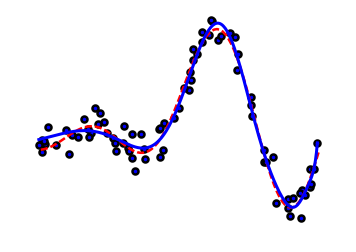

In [6]:
# create an instance of a kernel-based regressor from scikit learn
regressor = KernelRidge(kernel = 'poly',degree = best_param)

# fit our chosen regressor to the dataset
regressor.fit(input_data_2[:, np.newaxis], output_data_2)                              

# plot pts (in black), true function (in dashed red), and approximation (in blue)
utils.plot_approx(regressor,input_data_2,output_data_2,true_x_2,true_y_2)

TODO: After running the two Python cells above answer following questions.
    
- Does the resulting parameter provide a good fit to the dataset?  As good as when you tuned the parameter by hand?

Yes, it works very well and I actually ended up with something similar to this except slight worse as I tuned to 35.

- When the cross-validation cell, does it always result in the same best_param being chosen?

In this case, it is set up to run with the best parameter based on what we've used.

### Tree-based regressors

Now its your turn.  Use the two Python cells above - as well as the work you did in the Layer 1 regression notebook - to cross-validate a tree-based algorithm.  Two cells with starter code are provided below - make sure to complete them with your code.

Keep things simple here - if your algorithm has several parameters only cross-validate using one - the one you played with in the Layer 1 regression notebook.

In [7]:
# TODO: load in your tree-based regressor, and create a default instance of it
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor()

# TODO: fill in parameter range to test over
parameters = {'max_depth':np.arange(1,10)}

# create an instance of the GridSearchCV cross-validator - using our regressor and choice or parameters
cross_validator = GridSearchCV(regressor, parameters)

# run the cross-validation algorithm
cross_validator.fit(input_data_2[:, np.newaxis],output_data_2)      

# get the best parameter choice based on cross-validation and print out
best_param =  cross_validator.best_estimator_.max_depth     
print 'best parameter according to cross-validation is = ' + str(best_param)

best parameter according to cross-validation is = 6


With the best choice of parameter found via cross-validation, lets look at the resulting model.

In the next cell we plot the result of a tree-based regressor fit to the data - plugging in the best_param found via cross-validation above.

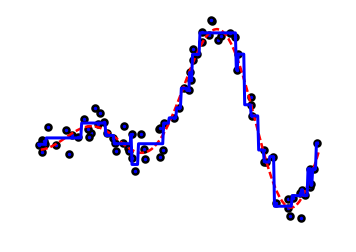

In [8]:
# create a default instance of the regressor
regressor = DecisionTreeRegressor(max_depth = best_param)

# fit our chosen regressor to the dataset
regressor.fit(input_data_2[:, np.newaxis], output_data_2)                              

# plot pts (in black), true function (in dashed red), and approximation (in blue)
utils.plot_approx(regressor,input_data_2,output_data_2,true_x_2,true_y_2)

TODO: After running the two Python cells above answer following questions.
    
- Does the resulting parameter provide a good fit to the dataset?  As good as when you tuned the parameter by hand?

It's pretty solid but might be overfitting a bit/I think this is a recognition that a DecisionTreeRegressor may not be the best for this problem.


- When the cross-validation cell, does it always result in the same best_param being chosen?

Actually, now that I think about that, it depends upon the range of best parameter selected so though its a remote possibility, there may be a best_param not selected.

### Neural network based regressors

Last but not least - neural networks.  Use the two Python cells fully detailed in the kernel regressor section - as well as the work you did in the Layer 1 regression notebook - to cross-validate a neural-net-based algorithm.  Two cells with starter code are provided below - make sure to complete them with your code.

Keep things simple here - if your algorithm has several parameters only cross-validate using one - the one you played with in the Layer 1 regression notebook.

In [9]:
# TODO: load in your net-based regressor, and create a default instance of it
from sklearn.neural_network import MLPRegressor

regressor = MLPRegressor()

# TODO: fill in parameter range to test over
parameters = {'hidden_layer_sizes':np.arange(1,100), 'solver':['lbfgs']}

# create an instance of the GridSearchCV cross-validator - using our regressor and choice or parameters
cross_validator = GridSearchCV(regressor, parameters)

# run the cross-validation algorithm
cross_validator.fit(input_data_2[:, np.newaxis],output_data_2)      

# get the best parameter choice based on cross-validation and print out
best_param =  cross_validator.best_estimator_.hidden_layer_sizes    
print 'best parameter according to cross-validation is = ' + str(best_param)

best parameter according to cross-validation is = 76


With the best choice of parameter found via cross-validation, lets look at the resulting model.

In the next cell we plot the result of a neural-net-based regressor fit to the data - plugging in the best_param found via cross-validation above.

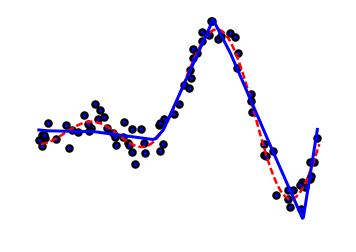

In [10]:
# TODO: create an instance of a kernel-based regressor from scikit learn
regressor = MLPRegressor(hidden_layer_sizes=best_param, solver='lbfgs')

# fit our chosen regressor to the dataset
regressor.fit(input_data_2[:, np.newaxis], output_data_2)                              

# plot pts (in black), true function (in dashed red), and approximation (in blue)
utils.plot_approx(regressor,input_data_2,output_data_2,true_x_2,true_y_2)

TODO: After running the two Python cells above answer following questions.
    
- Does the resulting parameter provide a good fit to the dataset?  As good as when you tuned the parameter by hand?

It consistently keeps the best parameter which is great but again goes back to the problem of the range selection I highlighted earlier.


- When the cross-validation cell, does it always result in the same best_param being chosen?

See above

### Cross-validation for regression -conclusions

What conclusions can you draw from these exerises?  Here's one question to get you started.

**TODO:**

- Given the computational load of a single regression algorithm, what do you think is (roughly) a lower bound on the computation required to perform the sort of cross-validation we used here for a single parameter with X choices of that parameter?  What if we have 10 parameters?    What can you conclude about from this about the amount of computation time required for cross-validation?

It's an excellent question and at the moment I don't quite have the answer but I'll research it.

##  2. Cross-validation for classification

Now lets apply cross-validation to tune the parameters of our kernel, tree, and neural-network based classification algorithms.  

> **Make sure you have your completed version of the Layer 1 classification  notebook open while you work on the following exercises.**

For simple experiments we can once again use scikit-learn package GridSearchCV, and syntax-wise everything works generally the same way.

Again we load in this functionality via the next Python cell.

In [11]:
# an easy to use cross-validation scikit-learn function
from sklearn.model_selection import GridSearchCV

Lets load up a dataset we first saw in the Layer 1 classification notebook.

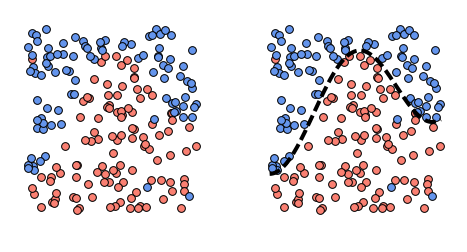

In [12]:
# load in the data and labels
data = np.asarray(pd.read_csv('datasets/classif_nonlinear_2class_data.csv'))
input_data_2 = data[:,:-1]
labels_2 = data[:,-1]

# load in the true polynomial separator
true_func_2 = np.asarray(pd.read_csv('datasets/classif_nonlinear_2class_func.csv'))

# plot the data and true underlying data-generating function
import classification_level_1_utils as utils  # a set of simple plotting utilities for this notebook
utils.classify_cust_plt_util(input_data_2,labels_2,true_func_2)

Remember the problem we have: regardless of the nonlinear classification algorithm-type we choose - whether kernel, tree, or neural net - we have parameters that need to be tuned.  Automatically.  This is where cross-validation comes in.

### Kernel-based classifiers

We will walk through the syntax of using GridSearchCV with the kernel based classifier we first saw in the Layer 1 classifier notebook.  Recall that there you tinkered around with the 'gamma' parameter of the 'rbf' kernel.  The code to declare an instance of this classifier looked like

> classifier = SVC(kernel = 'rbf',gamma = 1)

Now we will test out a whole range of values for gamma - say one hundred evenly spaced values between 0 and 10 -  and pick the best one via cross-validation.  The code for performing this cross-validation is in the next cell.

In [13]:
# load in SVC - a kernel classifier function from the scikit-learn library
from sklearn.svm import SVC

# create a default instance of the classifier
classifier = SVC()

# create a parameter range to test over
parameters = {'kernel':['rbf'], 'gamma':np.linspace(0,10,100)}

# create an instance of the GridSearchCV cross-validator - using our classifier and choice or parameters
cross_validator = GridSearchCV(classifier, parameters)

# get the best parameter choice based on cross-validation and print out
cross_validator.fit(input_data_2,labels_2)        
best_param =  cross_validator.best_estimator_.gamma     
print 'best parameter according to cross-validation is = ' + str(best_param)

best parameter according to cross-validation is = 4.54545454545


With the best choice of parameter found via cross-validation, lets look at the resulting model.

In the next cell we plot the result of a kernel classifier fit to the data - plugging in the best_param found via cross-validation above.

Our classifier mislabeled 10 of 200 points


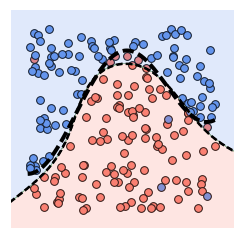

In [14]:
# create an instance of a kernel-based regressor from scikit learn
classifier = SVC(kernel = 'rbf',gamma = best_param)

# fit our chosen classifier to the dataset
classifier.fit(input_data_2, labels_2)                              

# plot pts (in red and blue), true separator (in dashed black), and approximation (in solid-black)
utils.plot_approx(classifier,input_data_2,labels_2,true_func_2)

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_2)
acc = len(labels_2) - accuracy_score(labels_2.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_2)) + ' points'

TODO: After running the two Python cells above answer following questions.
    
- Does the resulting parameter provide a good fit to the dataset?  As good as when you tuned the parameter by hand?

Did pretty well and actually better than what I did by hand.

- When the cross-validation cell, does it always result in the same best_param being chosen?

This goes to the range problem and being computationally expensive.

### Tree-based classifiers

Now its your turn.  Use the two Python cells above - as well as the work you did in the Layer 1 classification notebook - to cross-validate a tree-based algorithm.  Two cells with starter code are provided below - make sure to complete them with your code.

Keep things simple here - if your algorithm has several parameters only cross-validate using one - the one you played with in the Layer 1 classification notebook.

In [17]:
# TODO: load in your tree-based classifier, and create a default instance of it
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

# TODO: fill in parameter range to test over
parameters = {'max_depth':np.arange(1,10)}

# create an instance of the GridSearchCV cross-validator - using our classifier and choice or parameters
cross_validator = GridSearchCV(classifier, parameters)

# get the best parameter choice based on cross-validation and print out
cross_validator.fit(input_data_2,labels_2)        
best_param =  cross_validator.best_estimator_.max_depth     
print 'Best parameter according to cross-validation is = ' + str(best_param)

Best parameter according to cross-validation is = 9


With the best choice of parameter found via cross-validation, lets look at the resulting model.

In the next cell we plot the result of a tree classifier fit to the data - plugging in the best_param found via cross-validation above.

Our classifier mislabeled 0 of 200 points


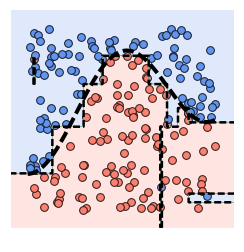

In [18]:
# TODO: create an instance of a tree-based classifier from scikit learn
classifier = DecisionTreeClassifier(max_depth=best_param)


# fit our chosen classifier to the dataset
classifier.fit(input_data_2, labels_2)                              

# plot pts (in red and blue), true separator (in dashed black), and approximation (in solid-black)
utils.plot_approx(classifier,input_data_2,labels_2,true_func_2)

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_2)
acc = len(labels_2) - accuracy_score(labels_2.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_2)) + ' points'

TODO: After running the two Python cells above answer following questions.
    
- Does the resulting parameter provide a good fit to the dataset?  As good as when you tuned the parameter by hand?

It's a better fit but overfits to the data to match the far right point which is something I did not do manually as I thought that generalizing would be better.

- When the cross-validation cell, does it always result in the same best_param being chosen?

I definitely think cross-validation should work a significant amount of the time but since decision trees can be extremely sensitive to small perturbations in the data, you can see that a slight change can result in a drastically different tree. Also, they can easily overfit. This can be negated by validation methods and pruning, but this is a grey area.

### Neural network based classifiers

Last but not least - neural networks.  Use the two Python cells fully detailed in the kernel classifor section - as well as the work you did in the Layer 1 classification notebook - to cross-validate a neural-net-based algorithm.  Two cells with starter code are provided below - make sure to complete them with your code.

Keep things simple here - if your algorithm has several parameters only cross-validate using one - the one you played with in the Layer 1 classification notebook.

In [ ]:
# TODO: load in your neural network classifier, and create a default instance of it
from sklearn.neural_network import MLPClassifier

# create an instance of a net-based regressor from scikit learn
classifier = MLPClassifier()

# TODO: fill in parameter range to test over
parameters = {'solver':['lbfgs'], 'hidden_layer_sizes':(np.arange(1,500), np.arange(1,500))}

# create an instance of the GridSearchCV cross-validator - using our classifier and choice or parameters
cross_validator = GridSearchCV(classifier, parameters)

# get the best parameter choice based on cross-validation and print out
cross_validator.fit(input_data_2,labels_2)        
best_param =  cross_validator.best_estimator_.hidden_layer_sizes    
print 'best parameter according to cross-validation is = ' + str(best_param)

With the best choice of parameter found via cross-validation, lets look at the resulting model.

In the next cell we plot the result of a neural-net classifier fit to the data - plugging in the best_param found via cross-validation above.

In [ ]:
# TODO: create an instance of a neural-net-based classifier from scikit learn
classifier = MLPClassifier(solver='lbfgs', hidden_layer_sizes=best_param

# fit our chosen classifier to the dataset
classifier.fit(input_data_2, labels_2)                              

# plot pts (in red and blue), true separator (in dashed black), and approximation (in solid-black)
utils.plot_approx(classifier,input_data_2,labels_2,true_func_2)

# print out the number of misclassified points
predicted_labels = classifier.predict(input_data_2)
acc = len(labels_2) - accuracy_score(labels_2.ravel(), predicted_labels.ravel(), normalize=False)
print 'Our classifier mislabeled ' + str(acc) + ' of ' + str(len(labels_2)) + ' points'

TODO: After running the two Python cells above answer following questions.
    
- Does the resulting parameter provide a good fit to the dataset?  As good as when you tuned the parameter by hand?

Yes, better than what I provided manually.


- When the cross-validation cell, does it always result in the same best_param being chosen?

No, it is not 

### Cross-validation for classification - conclusions

What conclusions can you draw from these demonstrations?  Here are some ideas to get you started.

**TODO**

1)   Given the computational load of a single clsasification algorithm, what do you think is (roughly) the computation required to perform the sort of cross-validation we used here for a single parameter with X choices of that parameter?  What if we have 10 parameters?  What can you conclude about from this about the amount of computation time required for cross-validation?


2)  Did you get the same results when you ran cross-validation twice for the same algorithm?  If they were different, how varied were your results?  Why do you think this happens?